# Introduction to regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of variables, even chorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view and fit

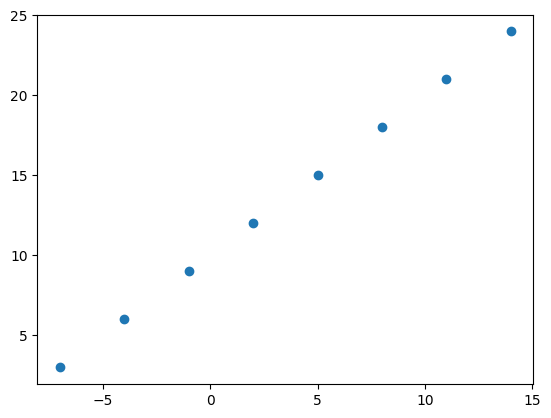

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our NumPy arays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

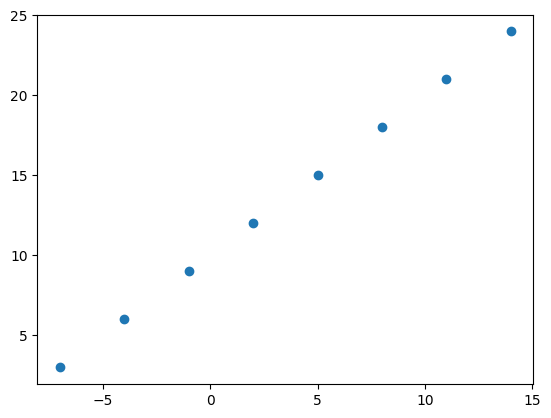

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,             # mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])    # sgd -> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 718ms/step - loss: 14.6125 - mae: 14.6125
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4800 - mae: 14.4800
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 14.3475 - mae: 14.3475
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 14.2150 - mae: 14.2150
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.0825 - mae: 14.0825


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 174ms/step


array([[-2.3786528]], dtype=float32)

In [15]:
y_pred + 11

array([[8.621347]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it trainning for longer) or on more data (give the model more examples to learn from)

In [16]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, -1), y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 804ms/step - loss: 20.5232 - mae: 20.5232
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 20.2420 - mae: 20.2420
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 19.9607 - mae: 19.9607
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 19.6795 - mae: 19.6795
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 19.3982 - mae: 19.3982
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 19.1170 - mae: 19.1170
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 18.8357 - mae: 18.8357
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 18.5545 - mae: 18.5545
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 18.2732 - mae: 18.2732
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 17.9920 - mae: 17.9920
Epoch 11/500
1/1 [==============================] - 

Epoch 94/500
1/1 [==============================] - 0s 19ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/500
1/1 [==============================] - 0s 11ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/500
1/1 [==============================] - 0s 9ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/500
1/1 [==============================] - 0s 10ms/step - loss: 6.8494 - mae: 6.8494
Epoch 98/500
1/1 [==============================] - 0s 12ms/step - loss: 6.8438 - mae: 6.8438
Epoch 99/500
1/1 [==============================] - 0s 8ms/step - loss: 6.8381 - mae: 6.8381
Epoch 100/500
1/1 [==============================] - 0s 8ms/step - loss: 6.8325 - mae: 6.8325
Epoch 101/500
1/1 [==============================] - 0s 17ms/step - loss: 6.8269 - mae: 6.8269
Epoch 102/500
1/1 [==============================] - 0s 14ms/step - loss: 6.8213 - mae: 6.8213
Epoch 103/500
1/1 [==============================] - 0s 10ms/step - loss: 6.8156 - mae: 6.8156
Epoch 104/500
1/1 [==============================] - 0s 21m

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 153ms/step


array([[30.22457]], dtype=float32)

In [19]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7101 - mae: 13.7101
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9719 - mae: 12.9719
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2329 - mae: 12.2329
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4892 - mae: 11.4892
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7379 - mae: 10.7379
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9764 - mae: 9.9764
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2030 - mae: 9.2030
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4157 - mae: 8.4157
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6125 - mae: 7.6125
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7910 - mae: 6.7910
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

In [20]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 200ms/step


array([[27.47844]], dtype=float32)

## Evaluating a model

In practice, a typical worflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluations ... there are 3 words you should memorize:

> 'Visualize, Visualize, Visualize

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

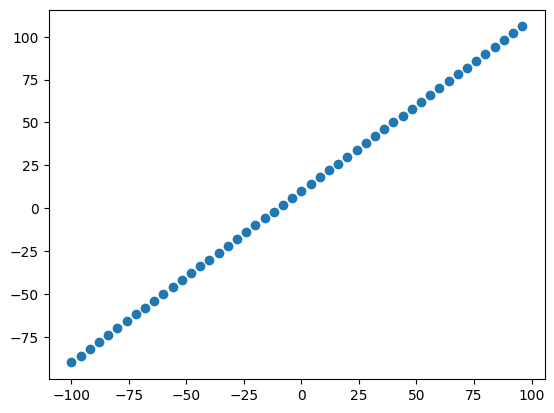

In [24]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...
* **Train set** - the model learns from this data, which is tipically 70 - 80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tipically 10 - 15%.
* **Test set** - the model gets evaluated on this data to test what iy has learned, this set is tipically 10 - 15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
 
 ow we've got our data in training and test sets... let's visualize it again!

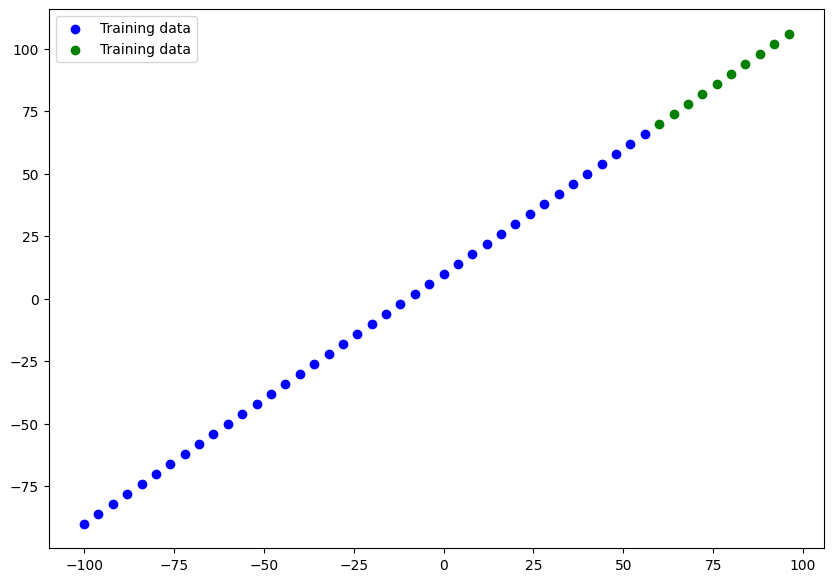

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Training data')
# Show a legend
plt.legend()

In [28]:
# Let's have look at how to build a neural network for our data

# 1.  Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [29]:
# model.summary()

In [30]:
X[0].shape, y[0]

(TensorShape([]), <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])



In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params . these parameters aren't updated during training (this is typical when you bring in already learn patterns or patameters from other models during **transfer learning**)

In [33]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 35.8159 - mae: 35.8159
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 30.0743 - mae: 30.0743
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 24.5378 - mae: 24.5378
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 18.9452 - mae: 18.9452
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 13.5657 - mae: 13.5657
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0324 - mae: 9.0324
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8398 - mae: 8.8398
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7688 - mae: 10.7688
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2445 - mae: 11.2445
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1675 - mae: 11.1675
Epoch 11/100
2/2 [==============================] - 0s 4ms/ste

2/2 [==============================] - 0s 7ms/step - loss: 0.5523 - mae: 0.5523
Epoch 86/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6813 - mae: 0.6813
Epoch 87/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6233 - mae: 0.6233
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7611 - mae: 0.7611
Epoch 89/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7378 - mae: 0.7378
Epoch 90/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4957 - mae: 0.4957
Epoch 91/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3470 - mae: 0.3470
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2261 - mae: 0.2261
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1866 - mae: 0.1866
Epoch 94/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2685 - mae: 0.2685
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8454 - ma

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 108ms/step


array([[ 70.96098 ],
       [ 75.04128 ],
       [ 79.1216  ],
       [ 83.201904],
       [ 87.2822  ],
       [ 91.36251 ],
       [ 95.44281 ],
       [ 99.52313 ],
       [103.60344 ],
       [107.68374 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    '''
    Plots training data, test data and compares predictions to ground truth labels.
    '''

    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Test data')

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show the legend
    plt.legend()

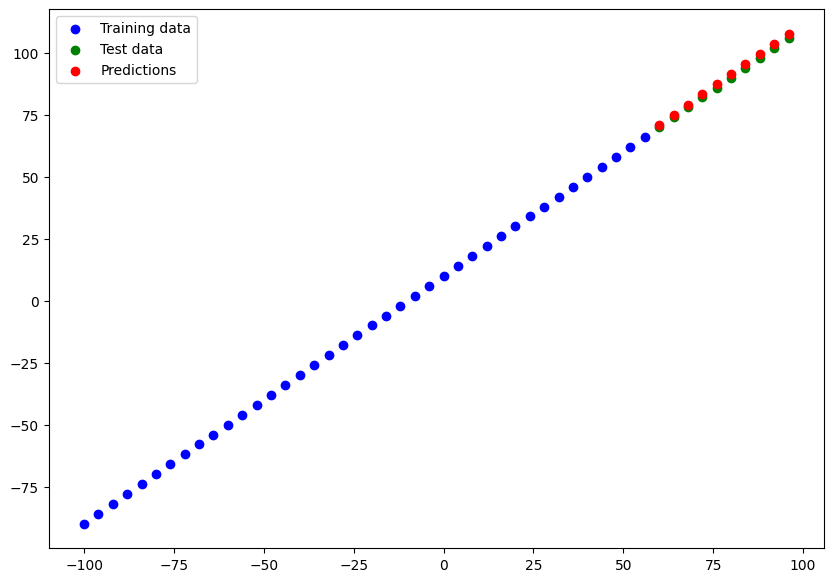

In [38]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics are:
* MAE - mean absolute error, 'on average, how wrong is each of my model's predictions'
* MSE - mean square error, 'square the average errors'

In [39]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 247ms/step - loss: 1.3224 - mae: 1.3224


[1.3223587274551392, 1.3223587274551392]

In [40]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.96098 ],
       [ 75.04128 ],
       [ 79.1216  ],
       [ 83.201904],
       [ 87.2822  ],
       [ 91.36251 ],
       [ 95.44281 ],
       [ 99.52313 ],
       [103.60344 ],
       [107.68374 ]], dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [42]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.3223603>

In [43]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.8018421>

In [44]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evualuate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more oportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
1. `model_2` - 2 layers, trained for 100 epochs.
1. `model_3` - 3 layers, trained for 500 epochs.

**Build `model_1`**

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 73.1239 - mae: 73.1239
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 37.8222 - mae: 37.8222
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7650 - mae: 8.7650
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6225 - mae: 9.6225
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5366 - mae: 10.5366
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7579 - mae: 9.7579
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8468 - mae: 8.8468
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0859 - mae: 9.0859
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.4076 - mae: 19.4076
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4929 - mae: 10.4929
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

2/2 [==============================] - 0s 7ms/step - loss: 7.0537 - mae: 7.0537
Epoch 63/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6864 - mae: 12.6864
Epoch 64/100
2/2 [==============================] - 0s 10ms/step - loss: 12.6285 - mae: 12.6285
Epoch 65/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4548 - mae: 9.4548
Epoch 66/100
2/2 [==============================] - 0s 9ms/step - loss: 11.5176 - mae: 11.5176
Epoch 67/100
2/2 [==============================] - 0s 10ms/step - loss: 8.0552 - mae: 8.0552
Epoch 68/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5828 - mae: 8.5828
Epoch 69/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2737 - mae: 12.2737
Epoch 70/100
2/2 [==============================] - 0s 8ms/step - loss: 8.9758 - mae: 8.9758
Epoch 71/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9511 - mae: 9.9511
Epoch 72/100
2/2 [==============================] - 0s 8ms/step - loss: 

In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

1/1 [==============================] - 0s 72ms/step


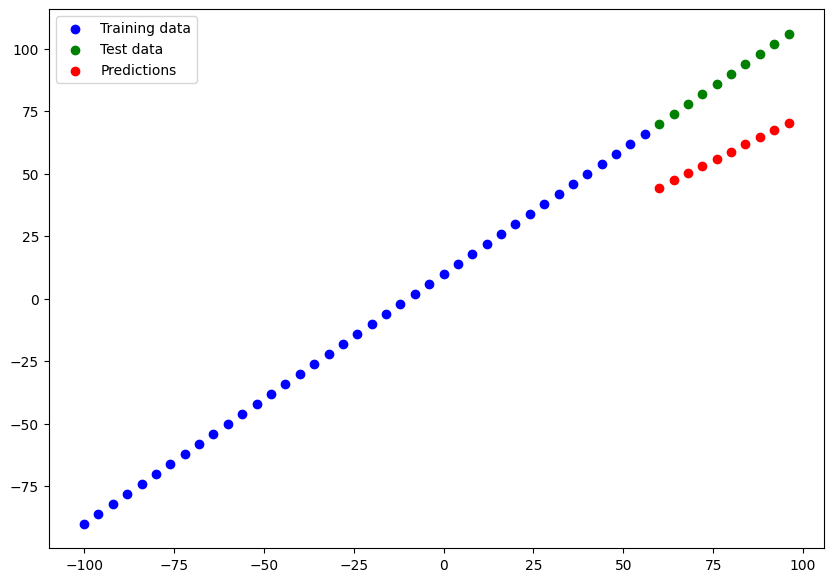

In [47]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Caluculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.59817>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.63293>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 1s 9ms/step - loss: 52.5179 - mae: 52.5179
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 28.5055 - mae: 28.5055
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 32.5852 - mae: 32.5852
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.3964 - mae: 13.3964
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 18.1189 - mae: 18.1189
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 8.0220 - mae: 8.0220
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8659 - mae: 12.8659
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1581 - mae: 11.1581
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.9731 - mae: 40.9731
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.3055 - mae: 28.3055
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 87ms/step


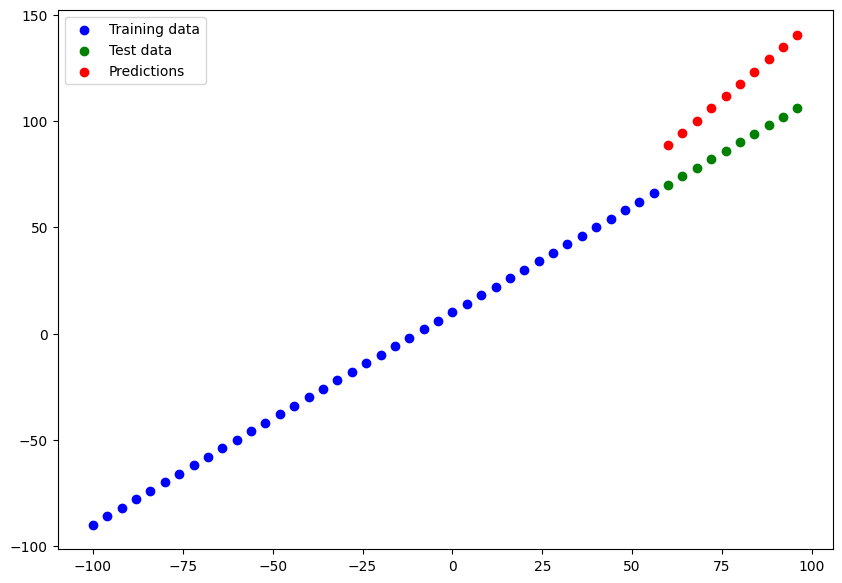

In [50]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.64234>,
 <tf.Tensor: shape=(), dtype=float32, numpy=736.02216>)

In [52]:
print(mae_1, mae_2)
print(mse_1, mse_2)

tf.Tensor(30.59817, shape=(), dtype=float32) tf.Tensor(26.64234, shape=(), dtype=float32)
tf.Tensor(946.63293, shape=(), dtype=float32) tf.Tensor(736.02216, shape=(), dtype=float32)


**Build `model_3`**

* 2 layers, trained for 500 epochs

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500


2/2 [==============================] - 1s 14ms/step - loss: 24.6653 - mae: 24.6653
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 23.3814 - mae: 23.3814
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.4652 - mae: 28.4652
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 16.4048 - mae: 16.4048
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 19.0946 - mae: 19.0946
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 13.4416 - mae: 13.4416
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.6285 - mae: 12.6285
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0664 - mae: 11.0664
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 39.8592 - mae: 39.8592
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.3325 - mae: 27.3325
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss

1/1 [==============================] - 0s 124ms/step


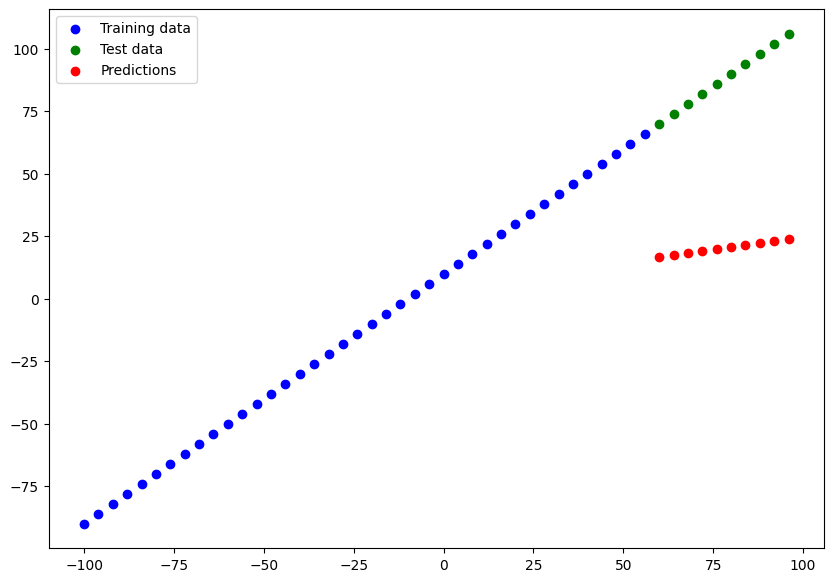

In [54]:
# Make and plot predictions of model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [55]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.79344>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4680.26>)

In [56]:
print(mae_1, mae_2, mae_3)
print(mse_1, mse_2, mse_3)

tf.Tensor(30.59817, shape=(), dtype=float32) tf.Tensor(26.64234, shape=(), dtype=float32) tf.Tensor(67.79344, shape=(), dtype=float32)
tf.Tensor(946.63293, shape=(), dtype=float32) tf.Tensor(736.02216, shape=(), dtype=float32) tf.Tensor(4680.26, shape=(), dtype=float32)


**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when neccesary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [57]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [   ['model_1', mae_1.numpy(), mse_1.numpy()],
                    ['model_2', mae_2.numpy(), mse_2.numpy()],
                    ['model_3', mae_3.numpy(), mse_3.numpy()]
                ]
# print(model_results)
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.598169,946.632935
1,model_2,26.642340,736.022156
2,model_3,67.793442,4680.259766


Looks like `model_2` performed the best...

In [58]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure outwhich don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experimets.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, thre are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments
* Weight and Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard). 

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF format

In [59]:
# Save the model using the SavedModel format
model_2.save('modelSaved_format')

INFO:tensorflow:Assets written to: modelSaved_format\assets


INFO:tensorflow:Assets written to: modelSaved_format\assets


In [60]:
# Save the model using the HDF5 format
model_2.save('HDF5_format')

INFO:tensorflow:Assets written to: HDF5_format\assets


INFO:tensorflow:Assets written to: HDF5_format\assets


In [61]:
model_2

## Loading in a saved model

In [62]:
# Loading in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('modelSaved_format')
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 116ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
# Compare the MAE of model_2_preds and loaded_SavedModel preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [66]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('HDF5_format')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# Check to see if loaded .h5 model predictions match model 2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 172ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the 'files' tab and right click on the file you're after and click 'download'
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [69]:
# Download a file from Google Colab
# from google.colab import files
# files.download('HDF5_format.h5')

In [70]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp 'HDF5_format.h5' 'content/drive/MyDrive/tensorflow'

In [71]:
# !ls 'content/drive/MyDrive/tensorflow'

## A larger example

In [72]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
insurance['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [74]:
# Let's try one-hote encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [75]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']


In [76]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [77]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [78]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [79]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8680.4697 - mae: 8680.4697
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7865.8823 - mae: 7865.8823
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.2290 - mae: 7573.2290
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.4966 - mae: 7732.4966
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7752.0586 - mae: 7752.0586
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7654.4282 - mae: 7654.4282
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3115 - mae: 7595.3115
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7720.6870 - mae: 7720.6870
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7466.1011 - mae: 7466.1011
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7686.8906 - mae: 7686.8906

34/34 [==============================] - 0s 3ms/step - loss: 7775.8208 - mae: 7775.8208
Epoch 15/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9380 - mae: 7589.9380
Epoch 16/100
34/34 [==============================] - 0s 4ms/step - loss: 7691.1099 - mae: 7691.1099
Epoch 17/100
34/34 [==============================] - 0s 3ms/step - loss: 7566.1733 - mae: 7566.1733
Epoch 18/100
34/34 [==============================] - 0s 4ms/step - loss: 7807.8291 - mae: 7807.8291
Epoch 19/100
34/34 [==============================] - 0s 5ms/step - loss: 7666.3354 - mae: 7666.3354
Epoch 20/100
34/34 [==============================] - 0s 3ms/step - loss: 7869.0942 - mae: 7869.0942
Epoch 21/100
34/34 [==============================] - 0s 3ms/step - loss: 7515.8740 - mae: 7515.8740
Epoch 22/100
34/34 [==============================] - 0s 3ms/step - loss: 7754.4404 - mae: 7754.4404
Epoch 23/100
34/34 [==============================] - 0s 2ms/step - loss: 7642.1016 - mae: 7642.1016
Epo

In [80]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7185.6118 - mae: 7185.6118


[7185.61181640625, 7185.61181640625]

In [81]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and imporve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [82]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


34/34 [==============================] - 2s 3ms/step - loss: 13308.1338 - mae: 13308.1338
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13174.7383 - mae: 13174.7383
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12884.5898 - mae: 12884.5898
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12288.9619 - mae: 12288.9619
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11238.2578 - mae: 11238.2578
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9800.6426 - mae: 9800.6426
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8385.1836 - mae: 8385.1836
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.5796 - mae: 7605.5796
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7447.2500 - mae: 7447.2500
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7424.1514 - mae: 7424.1514
E

In [83]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 4959.0278 - mae: 4959.0278


[4959.02783203125, 4959.02783203125]

In [84]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7185.6118 - mae: 7185.6118


[7185.61181640625, 7185.61181640625]

In [85]:
# Set random weed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200


34/34 [==============================] - 2s 5ms/step - loss: 13290.1055 - mae: 13290.1055
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13127.9072 - mae: 13127.9072
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12785.3545 - mae: 12785.3545
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12112.6807 - mae: 12112.6807
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10988.9336 - mae: 10988.9336
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9560.3037 - mae: 9560.3037
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8241.9854 - mae: 8241.9854
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7582.9644 - mae: 7582.9644
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7464.3501 - mae: 7464.3501
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7442.4395 - mae: 7442.4395
E

In [86]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3495.6836 - mae: 3495.6836


[3495.68359375, 3495.68359375]

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7185.6118 - mae: 7185.6118


[7185.61181640625, 7185.61181640625]

Text(0.5, 0, 'epochs')

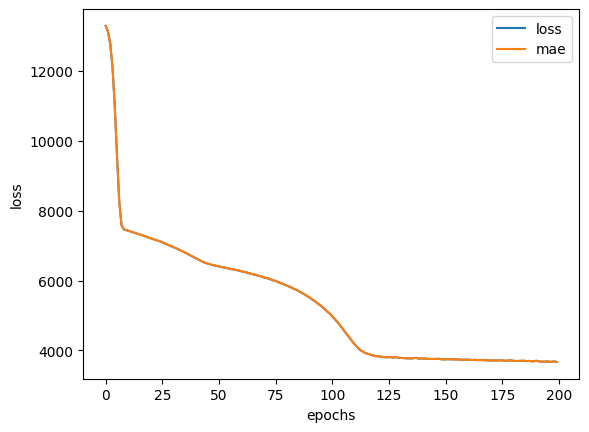

In [88]:
# Plot history (also known as aloss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain.

## Preprocessing data (normalization and standarization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

<Axes: ylabel='Frequency'>

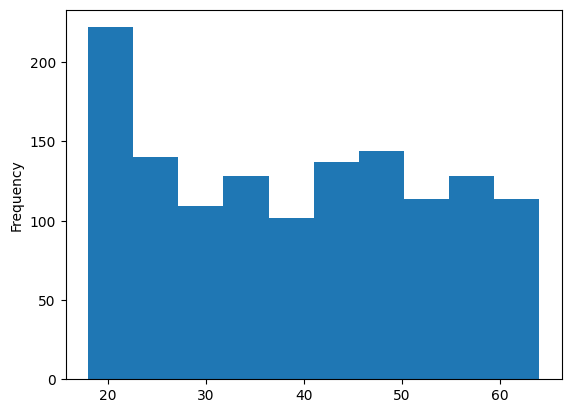

In [89]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

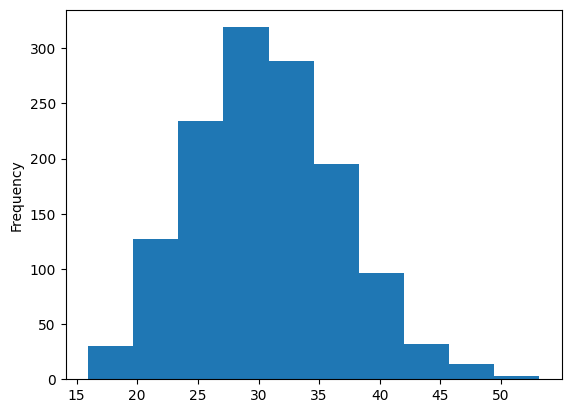

In [90]:
 X['bmi'].plot(kind='hist')

In [91]:
X['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as plt

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and tes sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [94]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [95]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [96]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [98]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100


34/34 [==============================] - 2s 4ms/step - loss: 13344.0234 - mae: 13344.0234
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13336.2471 - mae: 13336.2471
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13316.7207 - mae: 13316.7207
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13275.1543 - mae: 13275.1543
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13200.3184 - mae: 13200.3184
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13081.1641 - mae: 13081.1641
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12907.4453 - mae: 12907.4453
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12669.0254 - mae: 12669.0254
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12355.6162 - mae: 12355.6162
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11961.4199 - mae: 11

In [99]:
# Evaluate our insurance model trained no normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3437.2578 - mae: 3437.2578


[3437.2578125, 3437.2578125]

In [100]:
# Insurance model 2 results
# 9/9 [==============================] - 1s 3ms/step - loss: 4959.0278 - mae: 4959.0278

In [101]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
